# Figures from the paper by Irene Bonati, Marine Lasbleis, and  Lena Noack, JGR: Planets (2020)

Data should be in the folder ../data

You need first to download them: see the file download_data.py

Then you'll need a yaml file containing all the properties of each "planet". You can create it by running the function explore_all_create_yaml in parameters.py (see below)

## Packages

In [1]:
%matplotlib inline

# Import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings, os
warnings.filterwarnings('ignore')

# Import parameter and evolution codes
from coreevolution import evolution, parameters
import palettable

# Plot folder
plots_folder = "../Figures/"
if not os.path.exists(plots_folder):
    os.makedirs(plots_folder)

# Data folder
data_folder = "../data/Ini_With_DTcmb/"

# Colormap (Crameri 2018)
lajolla = palettable.scientific.sequential.LaJolla_20.mpl_colormap
lajolla_r = palettable.scientific.sequential.LaJolla_20_r.mpl_colormap
oslo = palettable.scientific.sequential.Oslo_20.mpl_colormap
vik = palettable.scientific.diverging.Vik_20.mpl_colormap
bamako = palettable.scientific.sequential.Bamako_20.mpl_colormap

# Constants
r_Earth=6371e3

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)


# Columns of interior structure files
names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
        "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

from coreevolution.parameters import T_liquidus_mantle, T_liquidus_core, name_file

def file(M, Fe, FeM=0):
    return data_folder+name_file(Fe, M, FeM)

## Download and order the data

In [2]:
import download_data
#download_data.data_structures("../data/")
#download_data.data_qcmb("../data/")

## Create the yaml file for each planet structure

In [4]:
parameters.explore_all_create_yaml("../data/Ini_With_DTcmb/")
parameters.explore_all_create_yaml("../data/Ini_No_DTcmb/")

Creating ../data/Ini_With_DTcmb_warm//all_files_list.txt data file
Creating ../data/Ini_No_DTcmb//all_files_list.txt data file


## Functions for  plots

In [40]:
def plot_contourf(X,Y,arr,Masses,Fe,Fe_mantle,levels,levels_plot,colormap=plt.cm.magma,clabel="example",figname="example.pdf"):
    fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
    plt.subplots_adjust(wspace = 0.2)
    
    for i in range(len(Fe_mantle)):
        sc = ax[i].contourf(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels, cmap = colormap) 
        sc2 = ax[i].contour(X,Y,arr[:,i*len(Masses):len(Masses)*(i+1)],levels_plot,colors=('white',),linestyles=('-',),linewidths=(1,))
        ax[i].clabel(sc2, fmt = '%2.1f', colors = 'white', fontsize=11)
        if i!=0:
            ax[i].set_ylabel("")
        else:
            ax[i].set_ylabel("Fe content (wt.%)")
        ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]*1e-2))
        #ax[i].set_title('Bulk LE content={}%'.format(LE[i]*1e2))
        ax[i].yaxis.set_ticks_position('both')
        ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
        ax[i].set_xlim([0.8,2.0])
        ax[i].set_ylim([15,80])
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_ticks(levels_plot)
    cb.set_ticklabels(levels_plot)
    cb.set_label(clabel)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show()
    

colors = ["lightseagreen","crimson"]
ls = ["-",":"]
label_mass = ["1 $M_{Earth}$","2 $M_{Earth}$"]

def plot_evolution(nplot,Masses,Fe,arr,yl,figsize=[15,4],figname = "example.pdf"):
    fig, ax = plt.subplots(1, nplot,figsize=figsize,sharex=True)
    for b in range(nplot):
        for i, mass in enumerate(Masses):
            for j,iron in enumerate(Fe):
                if nplot ==1:
                    ax.plot(time[1:,i+j*len(Masses)]/1e9,arr[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax.set_ylabel(yl)
                    ax.set_xlabel('Time (Gyr)')
                    ax.set_xlim([0,5])
                    if j==0:
                        ax.plot(time[1:,i+j*len(Masses)]/1e9,arr[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])                   
                else:    
                    arr_plot = arr[b]
                    ax[b].plot(time[1:,i+j*len(Masses)]/1e9,arr_plot[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j])
                    ax[b].set_ylabel(yl[b])
                    ax[b].set_xlabel('Time (Gyr)')
                    ax[b].set_xlim([0,5])
                    if j==0 and b==nplot-1:
                        arr_plot = arr[b]
                        ax[b].plot(time[1:,i+j*len(Masses)]/1e9,arr_plot[1:,i+j*len(Masses)],color=colors[i],linestyle=ls[j],label=label_mass[i])
                if yl == ["Inner core radius fraction (%)","CMB temperature (K)","Fraction of light elements in the OC (%)"]:
                    ax[0].set_ylim(0,100)
                    ax[0].scatter(t_IC0[i]/1e9,0,s=30,color=colors[i],marker='*')
                    ax[1].scatter(t_IC0[i]/1e9,T_CMB0[i],s=30,color=colors[i],marker='*')
                if yl == ["CMB heat flow (W)","Secular cooling (W)","Latent + Gravitational heat (W)"]:
                    ax[b].set_ylim([0,1.5e14])
    if nplot>1:
        ax1 = ax[nplot-1]
        plt.subplots_adjust(wspace = 0.3)
    plt.savefig(plots_folder + figname, bbox_inches="tight")
    plt.show() 

## Figure 1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


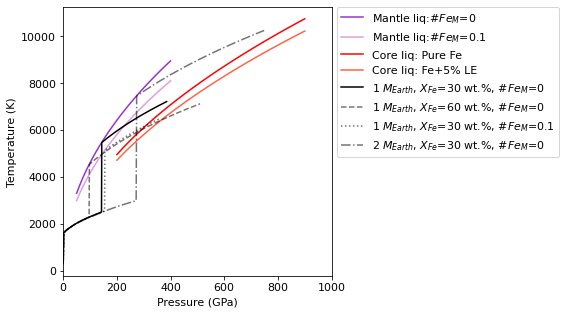

In [3]:
Mp = [1.,2.]  # Planetary masses
XFe = [30,60] # Bulk iron contents

masses = np.array(Mp)
label = ["1 $M_{Earth}$","2 $M_{Earth}$"]

plt.figure(figsize=(8,4.5))
ax = plt.gca()

# Plot melting temperatures
P_mantle = np.linspace(50, 400, XFe[0])
ax.plot(P_mantle, T_liquidus_mantle(P_mantle,0), color="darkorchid", label="Mantle liq:#$Fe_{M}$=0")
ax.plot(P_mantle, T_liquidus_mantle(P_mantle,0.1), color="plum", label="Mantle liq:#$Fe_{M}$=0.1")
P_core = np.linspace(200, 900, XFe[0])
ax.plot(P_core, T_liquidus_core(P_core), "r", label="Core liq: Pure Fe")
ax.plot(P_core, T_liquidus_core(P_core, 0.05), "tomato", label="Core liq: Fe+5% LE")

# Plot temperature profiles
for i, mass in enumerate(masses):
    data = pd.read_csv(file(mass, XFe[0], 0), skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i==0:
        ax.plot(data["p(GPa)"], data["T(K)"], '', color='black',label='1 $M_{Earth}$, $X_{Fe}$=30 wt.%, #$Fe_{M}$=0')
    else:
        ax.plot(data["p(GPa)"], data["T(K)"], '-.', color='black', label= "2 $M_{Earth}$, $X_{Fe}$=30 wt.%, #$Fe_{M}$=0",alpha=0.55)
    
    data = pd.read_csv(file(mass, XFe[1], 0), skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i==0:
        ax.plot(data["p(GPa)"], data["T(K)"], '--', color='black',label='1 $M_{Earth}$, $X_{Fe}$=60 wt.%, #$Fe_{M}$=0',alpha=0.55)
    
    data = pd.read_csv(file(mass, XFe[0], 10), skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i==0:
        ax.plot(data["p(GPa)"], data["T(K)"], ':', color='black',label='1 $M_{Earth}$, $X_{Fe}$=30 wt.%, #$Fe_{M}$=0.1',alpha=0.55)

ax.set_xlabel("Pressure (GPa)")
ax.set_ylabel("Temperature (K)")
ax.set_xlim([0, 1000])
ax.legend(bbox_to_anchor=(1,1.02))
plt.tight_layout()
plt.savefig(plots_folder + "Fig_1.pdf")

## Figure 2

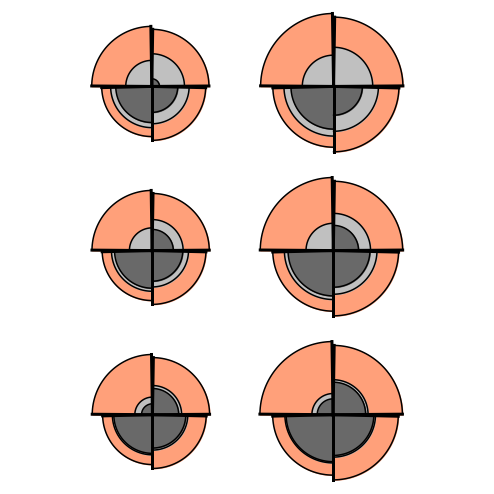

In [4]:
Mp  = [1.,2.]
XFe = [20.,40.,60.,80.]
FeM = [0.,10.,20.]
S = 0.

n_t = 50
n_XFe = len(XFe)
theta = np.linspace(-np.pi, np.pi, len(XFe)*n_t)

fig, ax = plt.subplots(len(FeM),1,figsize=[7, 7])

for i,Fem in enumerate(FeM):
    for j, mass in enumerate(Mp): 
        for k, Fe in enumerate(XFe):
            if k==n_XFe-1:
                th = theta[0:n_t]
            else:    
                th = theta[k*n_t+n_t:k*n_t+n_t+n_t]
            Planet = evolution.Rocky_Planet(Mp[j], XFe[k], FeM[i], S) 
            evo = evolution.Evolution(Planet)
            R_max = 1e7
            R_p = evo.planet.r_planet
            R_cmb = evo.planet.r_OC
            R_icb = evo.planet.r_IC_0 # change "0" to "005" or "011" to account for light elements

            ax[i].plot(R_p*np.sin(th)+2*j*R_max, R_p*np.cos(th), 'black',linewidth=1.5)
            ax[i].fill_between(R_p*np.sin(th)+2*j*R_max,0,R_p*np.cos(th),color='lightsalmon')
            ax[i].plot(R_cmb*np.sin(th)+2*j*R_max, R_cmb*np.cos(th), 'black',linewidth=1.5)
            ax[i].fill_between(R_cmb*np.sin(th)+2*j*R_max,0,R_cmb*np.cos(th),color='silver')
            ax[i].plot(R_icb*np.sin(th)+2*j*R_max, R_icb*np.cos(th), 'black')
            ax[i].fill_between(R_icb*np.sin(th)+2*j*R_max,0,R_icb*np.cos(th),color='dimgrey')
            ax[i].axis('equal')
            ax[i].axis("off")
            ax[i].plot(np.array([0, R_p*np.sin(th[0])])+2*j*R_max, [0, R_p*np.cos(th[0])], "black",linewidth=3)
            ax[i].plot(np.array([0, R_p*np.sin(th[-1])])+2*j*R_max, [0, R_p*np.cos(th[-1])], "black",linewidth=3)

plt.tight_layout()
plt.savefig(plots_folder + "Fig_2.pdf")

## Figure 3

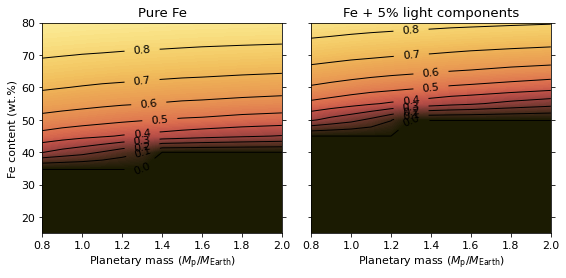

In [43]:
Mp = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8,  2.]
XFe = [15, 20, 25, 30, 35, 40, 45, 50,  55, 60,  65, 70,  75, 80]
#XFe = [15,  25, 35,  45,  55,  65,   75]
FeM = 0 # Change to "10" or "20" to consider mantle iron numbers of 0.1 and 0.2, respectively
S = 0.

M, F = np.meshgrid(Mp, XFe)
r_CMB = np.zeros_like(M)
rIC_005 = np.zeros_like(M)
rIC = np.zeros_like(M)

for i, mass in enumerate(Mp):
    for j, iron in enumerate(XFe):
        Planet = evolution.Rocky_Planet(Mp[i], XFe[j], FeM, S) 
        evo = evolution.Evolution(Planet)
        r_CMB[j,i] = evo.planet.r_OC
        rIC[j, i] = evo.planet.r_IC_0
        rIC_005[j, i] = evo.planet.r_IC_005

fig, ax = plt.subplots(1, 2, figsize=[8,4],sharey=True)
levels_rICf = np.linspace(0, 1, 11)

ax[0].contourf(M, F, (rIC)/r_CMB, np.linspace(0, 1, 100), cmap = lajolla_r)
val = ax[0].contour(M, F, (rIC)/r_CMB, levels_rICf, colors='black',linewidths=1)
ax[0].clabel(val, fmt = '%2.1f', colors = 'black', fontsize=11)
ax[0].set_ylabel("Fe content (wt.%)")
ax[0].set_title("Pure Fe")
ax[0].yaxis.set_ticks_position('both')
ax[0].set_xlabel("Planetary mass ($M_{\mathrm{p}}/M_{\mathrm{Earth}}$)")

ax[1].contourf(M, F, (rIC_005)/(r_CMB), np.linspace(0, 1, 100), cmap = lajolla_r)
val = ax[1].contour(M, F, (rIC_005)/r_CMB, levels_rICf, colors='black',linewidths=1)
ax[1].clabel(val, fmt = '%2.1f', colors = 'black', fontsize=11)
ax[1].set_title("Fe + 5% light components")
ax[1].yaxis.set_ticks_position('both')
ax[1].set_xlabel("Planetary mass ($M_{\mathrm{p}}/M_{\mathrm{Earth}}$)")

plt.tight_layout()
plt.savefig(plots_folder + "Fig_3.pdf")

## Figure 4

The magnetic field lifetime is 2.7800040 billion years.
The magnetic field lifetime is 5.0000000 billion years.
The magnetic field lifetime is 3.8200280 billion years.
The magnetic field lifetime is 5.0000000 billion years.


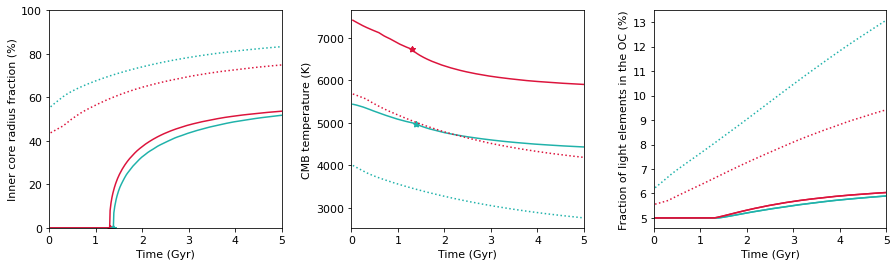

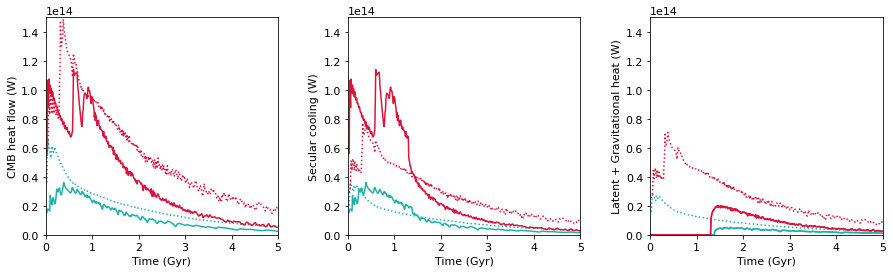

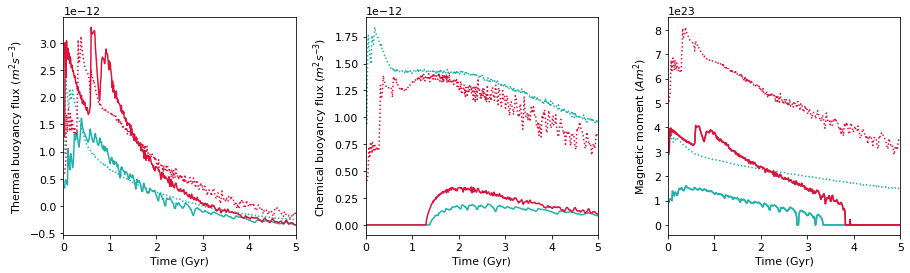

In [35]:
Masses = [1.,2.]
Fe = [30.,60.]
Fe_mantle = 0.
S=0.05

T_ICB = np.zeros((499,len(Fe)*len(Masses)),dtype=np.float64)
time = np.zeros_like(T_ICB)
r_ICB = np.zeros_like(T_ICB)
QC = np.zeros_like(T_ICB)
QL = np.zeros_like(T_ICB)
QX = np.zeros_like(T_ICB)
Q_comb = np.zeros_like(T_ICB)
Q_CMB = np.zeros_like(T_ICB)
T_CMB = np.zeros_like(T_ICB)
F_th = np.zeros_like(T_ICB)
F_X = np.zeros_like(T_ICB)
M = np.zeros_like(T_ICB)
S_t = np.zeros_like(T_ICB)
t_IC0 = np.zeros((len(Fe)*len(Masses),1),dtype=np.float64)
T_IC0 = np.zeros_like(t_IC0)
T_CMB0 = np.zeros_like(t_IC0)

for i, mass in enumerate(Masses):
    for j,iron in enumerate(Fe):
        Mp = mass
        XFe = iron
        FeM = Fe_mantle
        
        Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
        evo = evolution.Evolution(Planet)
        evo.run()
            
        T_ICB[:,i+j*len(Masses)] = evo.T
        r_ICB[:,i+j*len(Masses)] = (evo.r_IC/evo.planet.r_OC)*100.
        QC[:,i+j*len(Masses)] = evo.QC
        QL[:,i+j*len(Masses)] = evo.QL
        QX[:,i+j*len(Masses)] = evo.QX
        Q_comb[:,i+j*len(Masses)] = QL[:,i+j*len(Masses)] + QX[:,i+j*len(Masses)]
        Q_CMB[:,i+j*len(Masses)] = evo.Q_CMB
        T_CMB[:,i+j*len(Masses)] = evo.T_CMB
        F_th[:,i+j*len(Masses)] = evo.F_th
        F_X[:,i+j*len(Masses)] = evo.F_X
        M[:,i+j*len(Masses)] = evo.M
        S_t[:,i+j*len(Masses)] = evo.S_t
        if r_ICB[0,i+j*len(Masses)] ==0:
            t_IC0[i] = evo.t_IC0
            T_IC0[i] = evo.T_IC0
            T_CMB0[i]=evo.T_CMB0
        time[:,i+j*len(Masses)] = evo.planet.time_vector
        
# Plot r_ICB and T_ICB
yl = ["Inner core radius fraction (%)","CMB temperature (K)","Fraction of light elements in the OC (%)"]
arr = [r_ICB,T_CMB,S_t*1e2]
plot_evolution(3,Masses,Fe,arr,yl,figsize=[15,4],figname = "Evo_IC.pdf")

# Plot energy budgets
yl = ["CMB heat flow (W)","Secular cooling (W)","Latent + Gravitational heat (W)"]
arr = [Q_CMB,QC,Q_comb]
plot_evolution(3,Masses,Fe,arr,yl,figsize=[15,4],figname = "Evo_Energy.pdf")

# Plot buoyancy fluxes
yl = ["Thermal buoyancy flux ($m^{2}s^{-3}$)","Chemical buoyancy flux ($m^{2}s^{-3}$)","Magnetic moment ($A m^{2}$)"]
arr = [F_th,F_X,M]
plot_evolution(3,Masses,Fe,arr,yl,figsize=[15,4],figname = "Evo_buoyancy_MF.pdf")

## Figure 5 and Figure 7

In [36]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7,1.8,1.9, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
Fe_mantle = [0.00,10.,20.]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
r_IC_beginning = np.zeros_like(r_IC_end)
MF_lifetime = np.zeros_like(r_IC_end)
MF_strength = np.zeros_like(r_IC_end)
MF_surface = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)
MP = np.zeros_like(r_IC_end)
r_planet = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
             
            r_IC_beginning[j,i+m*len(Masses)] = evo.planet.r_IC_0/1e3 
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3      
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf
            MF_strength[j,i+m*len(Masses)] = np.max(evo.M_ratio)
            MF_surface[j,i+m*len(Masses)] = np.max(evo.Bs*1e6)
            r_planet[j,i+m*len(Masses)] = evo.planet.r_planet
            MP[j,i+m*len(Masses)] = evo.planet.Mp

0.8 15 0.0 0.0
The magnetic field lifetime is 1.7400010 billion years.
0.8 20 0.0 0.0
The magnetic field lifetime is 1.9600350 billion years.
0.8 25 0.0 0.0
The magnetic field lifetime is 2.2400010 billion years.
0.8 30 0.0 0.0
The magnetic field lifetime is 2.3000060 billion years.
0.8 35 0.0 0.0
The magnetic field lifetime is 2.3900010 billion years.
0.8 40 0.0 0.0
The magnetic field lifetime is 2.5100030 billion years.
0.8 45 0.0 0.0
The magnetic field lifetime is 2.5900070 billion years.
0.8 50 0.0 0.0
The magnetic field lifetime is 2.7500050 billion years.
0.8 55 0.0 0.0
The magnetic field lifetime is 2.7900130 billion years.
0.8 60 0.0 0.0
The magnetic field lifetime is 2.8200170 billion years.
0.8 65 0.0 0.0
The magnetic field lifetime is 2.5000036 billion years.
0.8 70 0.0 0.0
The magnetic field lifetime is 2.1800084 billion years.
0.8 75 0.0 0.0
The magnetic field lifetime is 1.8699944 billion years.
0.8 80 0.0 0.0
The magnetic field lifetime is 0.8600034 billion years.
0.9 15

The magnetic field lifetime is 3.2200140 billion years.
1.6 40 0.0 0.0
The magnetic field lifetime is 3.3500190 billion years.
1.6 45 0.0 0.0
The magnetic field lifetime is 3.5600190 billion years.
1.6 50 0.0 0.0
The magnetic field lifetime is 3.7000030 billion years.
1.6 55 0.0 0.0
The magnetic field lifetime is 3.6600050 billion years.
1.6 60 0.0 0.0
The magnetic field lifetime is 3.5500060 billion years.
1.6 65 0.0 0.0
The magnetic field lifetime is 2.8600000 billion years.
1.6 70 0.0 0.0
The magnetic field lifetime is 1.8300010 billion years.
1.6 75 0.0 0.0
The magnetic field lifetime is 1.5500040 billion years.
1.6 80 0.0 0.0
The magnetic field lifetime is 1.3500010 billion years.
1.7 15 0.0 0.0
The magnetic field lifetime is 2.8400110 billion years.
1.7 20 0.0 0.0
The magnetic field lifetime is 2.8700070 billion years.
1.7 25 0.0 0.0
The magnetic field lifetime is 3.0000200 billion years.
1.7 30 0.0 0.0
The magnetic field lifetime is 3.0500220 billion years.
1.7 35 0.0 0.0
The ma

The magnetic field lifetime is 1.7700170 billion years.
1.1 55 10.0 0.0
The magnetic field lifetime is 1.3600060 billion years.
1.1 60 10.0 0.0
The magnetic field lifetime is 0.9500083 billion years.
1.1 65 10.0 0.0
The magnetic field lifetime is 0.8600054 billion years.
1.1 70 10.0 0.0
The magnetic field lifetime is 0.7699870 billion years.
1.1 75 10.0 0.0
The magnetic field lifetime is 0.7299693 billion years.
1.1 80 10.0 0.0
The magnetic field lifetime is 0.6700041 billion years.
1.2 15 10.0 0.0
The magnetic field lifetime is 2.5000190 billion years.
1.2 20 10.0 0.0
The magnetic field lifetime is 2.4500300 billion years.
1.2 25 10.0 0.0
The magnetic field lifetime is 2.4400100 billion years.
1.2 30 10.0 0.0
The magnetic field lifetime is 2.4800230 billion years.
1.2 35 10.0 0.0
The magnetic field lifetime is 2.7900200 billion years.
1.2 40 10.0 0.0
The magnetic field lifetime is 2.5200030 billion years.
1.2 45 10.0 0.0
The magnetic field lifetime is 2.0800000 billion years.
1.2 50 1

The magnetic field lifetime is 1.1400010 billion years.
1.9 65 10.0 0.0
The magnetic field lifetime is 1.0100040 billion years.
1.9 70 10.0 0.0
The magnetic field lifetime is 0.8400047 billion years.
1.9 75 10.0 0.0
The magnetic field lifetime is 0.6800031 billion years.
1.9 80 10.0 0.0
The magnetic field lifetime is 0.5200068 billion years.
2.0 15 10.0 0.0
The magnetic field lifetime is 2.6900200 billion years.
2.0 20 10.0 0.0
The magnetic field lifetime is 2.4800140 billion years.
2.0 25 10.0 0.0
The magnetic field lifetime is 2.6400150 billion years.
2.0 30 10.0 0.0
The magnetic field lifetime is 2.7400060 billion years.
2.0 35 10.0 0.0
The magnetic field lifetime is 2.3000080 billion years.
2.0 40 10.0 0.0
The magnetic field lifetime is 1.8500130 billion years.
2.0 45 10.0 0.0
The magnetic field lifetime is 1.6200000 billion years.
2.0 50 10.0 0.0
The magnetic field lifetime is 1.4300020 billion years.
2.0 55 10.0 0.0
The magnetic field lifetime is 1.2500040 billion years.
2.0 60 1

The magnetic field lifetime is 0.1700225 billion years.
1.4 75 20.0 0.0
The magnetic field lifetime is 0.1900229 billion years.
1.4 80 20.0 0.0
The magnetic field lifetime is 0.1600053 billion years.
1.5 15 20.0 0.0
The magnetic field lifetime is 1.3201070 billion years.
1.5 20 20.0 0.0
The magnetic field lifetime is 1.2700280 billion years.
1.5 25 20.0 0.0
The magnetic field lifetime is 0.8000066 billion years.
1.5 30 20.0 0.0
The magnetic field lifetime is 0.6100105 billion years.
1.5 35 20.0 0.0
The magnetic field lifetime is 0.5200002 billion years.
1.5 40 20.0 0.0
The magnetic field lifetime is 0.4600105 billion years.
1.5 45 20.0 0.0
The magnetic field lifetime is 0.4100258 billion years.
1.5 50 20.0 0.0
The magnetic field lifetime is 0.3900166 billion years.
1.5 55 20.0 0.0
The magnetic field lifetime is 0.3700172 billion years.
1.5 60 20.0 0.0
The magnetic field lifetime is 0.3800134 billion years.
1.5 65 20.0 0.0
The magnetic field lifetime is 0.3200941 billion years.
1.5 70 2

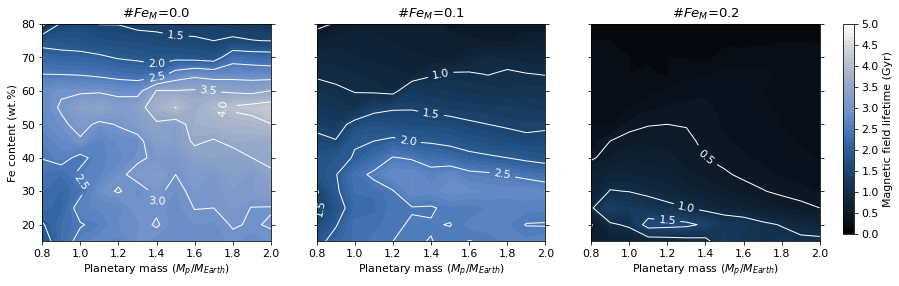

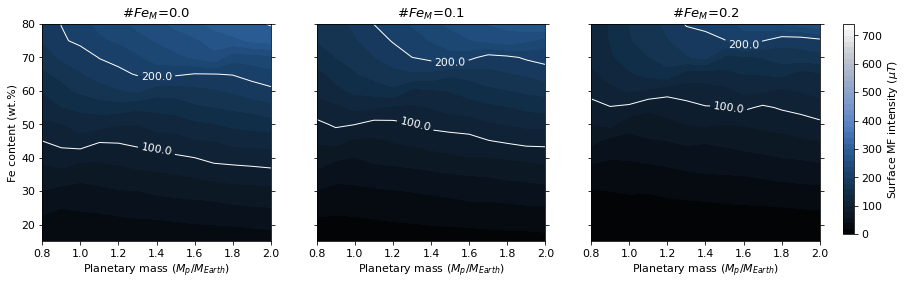

In [42]:
levels_ICMF = np.linspace(0, 1, 11)
levels_MF = np.linspace(0, 5, 51)
levels_MFplot = np.linspace(0, 5, 11)
levels_MFsurf = list(map(int,np.linspace(0,740,38)))
levels_MFsurfplot = list(map(int, np.linspace(0,800,9)))

# Plot initial inner core radius fraction
#plot_contourf(M,F,r_IC_end/r_OC,Masses,Fe,Fe_mantle,levels_ICMF,levels_ICMF,colormap=lajolla_r,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF_FeM.pdf")

# Plot magnetic field lifetime
plot_contourf(M,F,MF_lifetime,Masses,Fe,Fe_mantle,levels_MF,levels_MFplot,colormap=oslo,clabel="Magnetic field lifetime (Gyr)",figname="Fig_5.pdf")#Fig_5.pdf")

# Plot surface magnetic field strength
plot_contourf(M,F,MF_surface,Masses,Fe,Fe_mantle,levels_MFsurf,levels_MFsurfplot,colormap=oslo,clabel="Surface MF intensity ($\mu T$)",figname="Fig_7.pdf")#Fig_7.pdf")

In [38]:
print (np.max(MF_lifetime))
print (np.max(MF_surface))

4.260001
301.570817295056


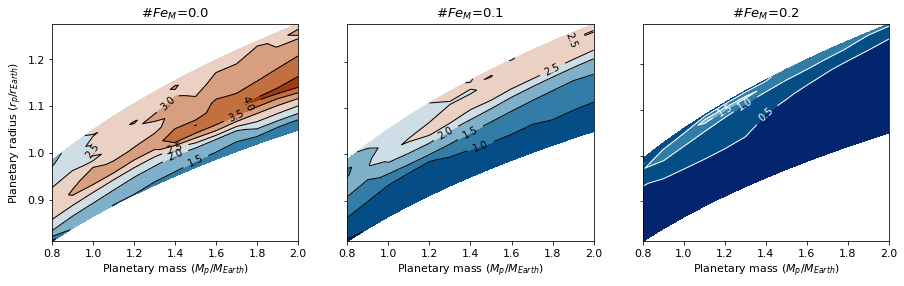

In [39]:
levels_obs = np.linspace(0,5,11)

fig,ax=plt.subplots(1,3,figsize=(15,4))
for i in range(len(Fe_mantle)):
    if i==2:
        c = 'white'
    else:
        c='black'
    sc = ax[i].contourf(MP[:,i*len(Masses):len(Masses)*(i+1)],r_planet[:,i*len(Masses):len(Masses)*(i+1)]/r_Earth,MF_lifetime[:,i*len(Masses):len(Masses)*(i+1)],edgecolor=c,levels=levels_obs,cmap=vik)
    sc2 = ax[i].contour(MP[:,i*len(Masses):len(Masses)*(i+1)],r_planet[:,i*len(Masses):len(Masses)*(i+1)]/r_Earth,MF_lifetime[:,i*len(Masses):len(Masses)*(i+1)],levels=levels_obs,colors=(c,),linestyles=('-',),linewidths=(1,))
    ax[i].set_xlabel('Planetary mass ($M_{p}/M_{Earth}$)')
    ax[i].clabel(sc2, fmt = '%2.1f', colors = c, fontsize=10)
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]*1e-2))
    if i==0:
        ax[i].set_ylabel('Planetary radius ($r_{p}/r_{Earth}$)')
    else:
        ax[i].get_yaxis().set_ticklabels([])
plt.savefig(plots_folder+'Fig_9.pdf')
plt.show()


## Figure 6, Figure 8, and Figure 11

In [28]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8,1.9, 2.]
Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
FeM = 0.
LE = [0.,0.05,0.1]

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(LE)))
r_IC_beginning = np.zeros_like(r_IC_end)
MF_lifetime = np.zeros_like(r_IC_end)
MF_strength = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)
S_S = np.zeros_like(r_IC_end)
MF_surface= np.zeros_like(r_IC_end)

for m,light_elements in enumerate(LE):
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            S = light_elements
            FeM = FeM
            print (Mp,XFe,FeM,S)
            
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)  
            evo = evolution.Evolution(Planet)            
            evo.run()   
            
            r_IC_beginning[j,i+m*len(Masses)] = evo.planet.r_IC_0/1e3
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf           
            S_S[j,i+m*len(Masses)] = evo.S_t[-1]
            MF_surface[j,i+m*len(Masses)] = np.max(evo.Bs*1e6)
            MF_strength[j,i+m*len(Masses)] = np.max(evo.M_ratio)  

0.8 15 0.0 0.0
The magnetic field lifetime is 1.7400010 billion years.
0.8 20 0.0 0.0
The magnetic field lifetime is 1.9600350 billion years.
0.8 25 0.0 0.0
The magnetic field lifetime is 2.2400010 billion years.
0.8 30 0.0 0.0
The magnetic field lifetime is 2.3000060 billion years.
0.8 35 0.0 0.0
The magnetic field lifetime is 2.3900010 billion years.
0.8 40 0.0 0.0
The magnetic field lifetime is 2.5100030 billion years.
0.8 45 0.0 0.0
The magnetic field lifetime is 2.5900070 billion years.
0.8 50 0.0 0.0
The magnetic field lifetime is 2.7500050 billion years.
0.8 55 0.0 0.0
The magnetic field lifetime is 2.7900130 billion years.
0.8 60 0.0 0.0
The magnetic field lifetime is 2.8200170 billion years.
0.8 65 0.0 0.0
The magnetic field lifetime is 2.5000036 billion years.
0.8 70 0.0 0.0
The magnetic field lifetime is 2.1800084 billion years.
0.8 75 0.0 0.0
The magnetic field lifetime is 1.8699944 billion years.
0.8 80 0.0 0.0
The magnetic field lifetime is 0.8600034 billion years.
0.9 15

The magnetic field lifetime is 3.2200140 billion years.
1.6 40 0.0 0.0
The magnetic field lifetime is 3.3500190 billion years.
1.6 45 0.0 0.0
The magnetic field lifetime is 3.5600190 billion years.
1.6 50 0.0 0.0
The magnetic field lifetime is 3.7000030 billion years.
1.6 55 0.0 0.0
The magnetic field lifetime is 3.6600050 billion years.
1.6 60 0.0 0.0
The magnetic field lifetime is 3.5500060 billion years.
1.6 65 0.0 0.0
The magnetic field lifetime is 2.8600000 billion years.
1.6 70 0.0 0.0
The magnetic field lifetime is 1.8300010 billion years.
1.6 75 0.0 0.0
The magnetic field lifetime is 1.5500040 billion years.
1.6 80 0.0 0.0
The magnetic field lifetime is 1.3500010 billion years.
1.7 15 0.0 0.0
The magnetic field lifetime is 2.8400110 billion years.
1.7 20 0.0 0.0
The magnetic field lifetime is 2.8700070 billion years.
1.7 25 0.0 0.0
The magnetic field lifetime is 3.0000200 billion years.
1.7 30 0.0 0.0
The magnetic field lifetime is 3.0500220 billion years.
1.7 35 0.0 0.0
The ma

The magnetic field lifetime is 4.0100250 billion years.
1.1 55 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 60 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 65 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.1 70 0.0 0.05
The magnetic field lifetime is 4.5800240 billion years.
1.1 75 0.0 0.05
The magnetic field lifetime is 3.1800040 billion years.
1.1 80 0.0 0.05
The magnetic field lifetime is 2.3800050 billion years.
1.2 15 0.0 0.05
The magnetic field lifetime is 2.6400230 billion years.
1.2 20 0.0 0.05
The magnetic field lifetime is 2.5300220 billion years.
1.2 25 0.0 0.05
The magnetic field lifetime is 3.4300160 billion years.
1.2 30 0.0 0.05
The magnetic field lifetime is 3.5300160 billion years.
1.2 35 0.0 0.05
The magnetic field lifetime is 3.7000030 billion years.
1.2 40 0.0 0.05
The magnetic field lifetime is 3.7000140 billion years.
1.2 45 0.0 0.05
The magnetic field lifetime is 3.7500110 billion years.
1.2 50 0

The magnetic field lifetime is 5.0000000 billion years.
1.9 65 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.9 70 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
1.9 75 0.0 0.05
The magnetic field lifetime is 2.9400000 billion years.
1.9 80 0.0 0.05
The magnetic field lifetime is 2.0800030 billion years.
2.0 15 0.0 0.05
The magnetic field lifetime is 2.7600210 billion years.
2.0 20 0.0 0.05
The magnetic field lifetime is 3.2600060 billion years.
2.0 25 0.0 0.05
The magnetic field lifetime is 3.4600120 billion years.
2.0 30 0.0 0.05
The magnetic field lifetime is 3.8200280 billion years.
2.0 35 0.0 0.05
The magnetic field lifetime is 4.0800130 billion years.
2.0 40 0.0 0.05
The magnetic field lifetime is 4.4700150 billion years.
2.0 45 0.0 0.05
The magnetic field lifetime is 4.4900200 billion years.
2.0 50 0.0 0.05
The magnetic field lifetime is 4.9100170 billion years.
2.0 55 0.0 0.05
The magnetic field lifetime is 5.0000000 billion years.
2.0 60 0

The magnetic field lifetime is 4.5800110 billion years.
1.5 15 0.0 0.1
The magnetic field lifetime is 2.8100160 billion years.
1.5 20 0.0 0.1
The magnetic field lifetime is 2.7900220 billion years.
1.5 25 0.0 0.1
The magnetic field lifetime is 2.8300280 billion years.
1.5 30 0.0 0.1
The magnetic field lifetime is 2.8500210 billion years.
1.5 35 0.0 0.1
The magnetic field lifetime is 3.4900060 billion years.
1.5 40 0.0 0.1
The magnetic field lifetime is 3.7400020 billion years.
1.5 45 0.0 0.1
The magnetic field lifetime is 3.9900030 billion years.
1.5 50 0.0 0.1
The magnetic field lifetime is 3.9200010 billion years.
1.5 55 0.0 0.1
The magnetic field lifetime is 4.1500100 billion years.
1.5 60 0.0 0.1
The magnetic field lifetime is 4.0200040 billion years.
1.5 65 0.0 0.1
The magnetic field lifetime is 5.0000000 billion years.
1.5 70 0.0 0.1
The magnetic field lifetime is 5.0000000 billion years.
1.5 75 0.0 0.1
The magnetic field lifetime is 5.0000000 billion years.
1.5 80 0.0 0.1
The ma

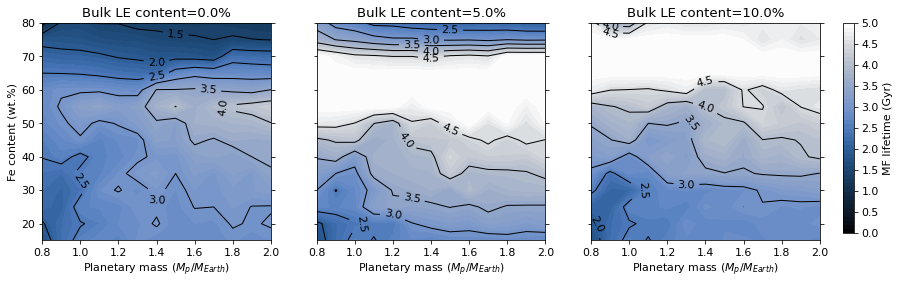

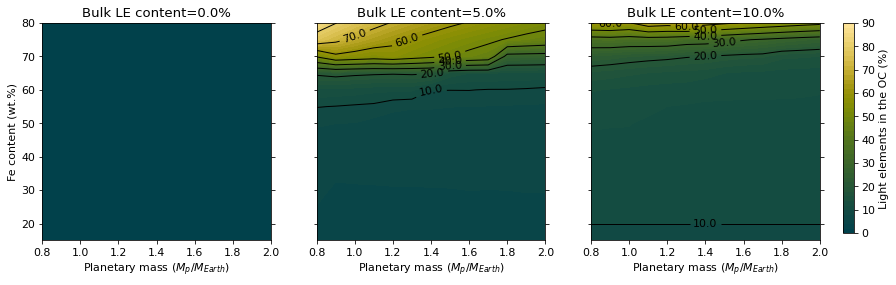

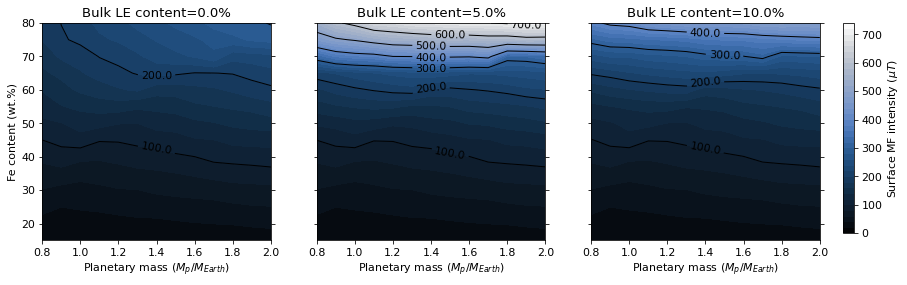

In [34]:
levels_S = np.linspace(0,90,46)
levels_Splot = list(map(int,np.linspace(0,90,10)))
levels_MF = np.linspace(0, 5, 51)
levels_MFplot = np.linspace(0, 5, 11)
levels_MFsurf = list(map(int,np.linspace(0,740,38)))
levels_MFsurfplot = list(map(int, np.linspace(0,800,9)))
levels_ICMF = np.linspace(0, 1, 11)

#plot_contourf(M,F,r_IC_beginning/r_OC,Masses,Fe,LE,levels_ICMF,levels_ICMF,colormap=lajolla_r,clabel="$r_{IC_{0}}$/$r_{OC}$",figname="ICMF0_S.pdf")

#plot_contourf(M,F,r_IC_end/r_OC,Masses,Fe,LE,levels_ICMF,levels_ICMF,colormap=lajolla_r,clabel="$r_{IC}$/$r_{OC}$",figname="ICMF_S.pdf")

plot_contourf(M,F,MF_lifetime,Masses,Fe,LE,levels_MF,levels_MFplot,colormap=oslo,clabel="MF lifetime (Gyr)",figname="Fig_6.pdf")
plot_contourf(M,F,S_S*1e2,Masses,Fe,LE,levels_S,levels_Splot,colormap=bamako,clabel="Light elements in the OC (%)",figname="Fig_11.pdf")
plot_contourf(M,F,MF_surface,Masses,Fe,LE,levels_MFsurf,levels_MFsurfplot,colormap=oslo,clabel="Surface MF intensity ($\mu T$)",figname="Fig_8.pdf")

In [33]:
print (np.max(MF_lifetime))
print (np.max(MF_surface))

5.0
714.757183930017


In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Figure 10

In [18]:
# Masses = [1.,2.]
# Fe_mantle = [0.]
# Fe = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
# S = 0.0

# M, F = np.meshgrid(Masses, Fe)
# r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
# tIC_70_0 = np.zeros_like(r_IC_end)
# r_OC = np.zeros_like(r_IC_end)

# for m,iron_mantle in enumerate(Fe_mantle):
#     for i, mass in enumerate(Masses):
#         for j,iron in enumerate(Fe):
#             Mp = mass
#             XFe = iron
#             FeM = iron_mantle
#             S = S
#             print (Mp,XFe,FeM,S)
#             Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
#             evo = evolution.Evolution(Planet)

#             evo.run()
            
#             tIC_70_0[j,i+m*len(Masses)] = evo.t_70/1e9
#             if evo.t_70/1e9<0.04:
#                 tIC_70_0[j,i+m*len(Masses)]=0.
#             if evo.t_70==0.:
#                 tIC_70_0[j,i+m*len(Masses)]=6.
#             print (tIC_70_0[j,i+m*len(Masses)])

# Fe_mantle = [10.]
# tIC_70_10 = np.zeros_like(r_IC_end)

# for m,iron_mantle in enumerate(Fe_mantle):
#     for i, mass in enumerate(Masses):
#         for j,iron in enumerate(Fe):
#             Mp = mass
#             XFe = iron
#             FeM = iron_mantle
#             S = S
#             print (Mp,XFe,FeM,S)
#             Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
#             evo = evolution.Evolution(Planet)

#             evo.run()
            
#             tIC_70_10[j,i+m*len(Masses)] = evo.t_70/1e9
#             if evo.t_70/1e9<0.04:
#                 tIC_70_10[j,i+m*len(Masses)] =0.
#             if evo.t_70==0.:
#                 tIC_70_10[j,i+m*len(Masses)]=6.

# Fe_mantle = [20.]
# tIC_70_20 = np.zeros_like(r_IC_end)

# for m,iron_mantle in enumerate(Fe_mantle):
#     for i, mass in enumerate(Masses):
#         for j,iron in enumerate(Fe):
#             Mp = mass
#             XFe = iron
#             FeM = iron_mantle
#             S = S
#             print (Mp,XFe,FeM,S)
#             Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
#             evo = evolution.Evolution(Planet)

#             evo.run()
            
#             tIC_70_20[j,i+m*len(Masses)] = evo.t_70/1e9
#             if evo.t_70/1e9<0.04:
#                 tIC_70_20[j,i+m*len(Masses)] =0.

1.0 15 0.0 0.0
The magnetic field lifetime is 2.6300040 billion years.
6.0
1.0 20 0.0 0.0
The magnetic field lifetime is 2.4700180 billion years.
6.0
1.0 25 0.0 0.0
The magnetic field lifetime is 2.6900200 billion years.
6.0
1.0 30 0.0 0.0
The magnetic field lifetime is 2.3900160 billion years.
3.920009
1.0 35 0.0 0.0
The magnetic field lifetime is 2.5900120 billion years.
3.0800240000000003
1.0 40 0.0 0.0
The magnetic field lifetime is 2.3800120 billion years.
2.460022
1.0 45 0.0 0.0
The magnetic field lifetime is 2.9500080 billion years.
1.180004
1.0 50 0.0 0.0
The magnetic field lifetime is 3.1400040 billion years.
0.7300004
1.0 55 0.0 0.0
The magnetic field lifetime is 3.3300070 billion years.
0.3600009
1.0 60 0.0 0.0
The magnetic field lifetime is 2.9300080 billion years.
0.060023219999999995
1.0 65 0.0 0.0
The magnetic field lifetime is 2.4700080 billion years.
0.0
1.0 70 0.0 0.0
The magnetic field lifetime is 2.1100090 billion years.
0.0
1.0 75 0.0 0.0
The magnetic field lifetim

In [31]:
# labels = ["1 $M_{Earth}$","2 $M_{Earth}$"]
# colors = ["lightseagreen","crimson"]
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 11}

# plt.rc('font', **font)
# plt.figure(figsize=[5,4])
# for i in range(len(Masses)):
#     plt.plot(F[:,i],tIC_70_0[:,i],label=labels[i],color=colors[i],linestyle='-')
#     plt.scatter(F[:,i],tIC_70_0[:,i],color=colors[i],s=6)
#     plt.plot(F[:,i],tIC_70_10[:,i],color=colors[i],linestyle='--')
#     plt.scatter(F[:,i],tIC_70_10[:,i],color=colors[i],s=6)
#     plt.plot(F[:,i],tIC_70_20[:,i],color=colors[i],linestyle=':')
#     plt.scatter(F[:,i],tIC_70_20[:,i],color=colors[i],s=6)
# plt.legend()
# plt.xlabel('Fe content (wt.%)')
# plt.ylabel('Time to reach 70% of core radius (Gyr)')
# plt.xlim([15,80])
# plt.ylim([0.,5.])
# ax = plt.gca()
# display = (0,1,2,3,4)
# FeM_0 = plt.Line2D((0,1),(0,0), color='k')
# FeM_10 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle='--')
# FeM_20 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend([handle for i,handle in enumerate(handles) if i in display]+[FeM_0,FeM_10,FeM_20],
# [label for i,label in enumerate(labels) if i in display]+['#$Fe_{M}$=0','#$Fe_{M}$=0.1', '#$Fe_{M}$=0.2' ],bbox_to_anchor=(0.97,0.96),borderaxespad=0.,fontsize=10)
# plt.savefig(plots_folder+"Fig_10.pdf")
# plt.show()

NameError: name 'tIC_70_0' is not defined

<Figure size 360x288 with 0 Axes>